In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.linear_model import LogisticRegression
from optbinning import OptimalBinning
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from IPython.display import Image
import pydotplus
df = pd.read_csv('2022.csv')

# Logistic Regression

In [2]:
df = df.rename(columns = {"Happiness score":"Score"})
df['Is.Happy'] =[1 if each>np.mean(df.Score) else 0 for each in df.Score]

feature_cols = ['Explained by: GDP per capita', 'Explained by: Social support', 
                'Explained by: Healthy life expectancy', 'Explained by: Freedom to make life choices',
                'Explained by: Generosity','Explained by: Perceptions of corruption']
X = df[feature_cols].values
y = df['Is.Happy'] 

In [3]:
df['Is.Happy'].value_counts()

1    74
0    72
Name: Is.Happy, dtype: int64

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
import statsmodels.api as sm
from statsmodels.api import Logit, add_constant
x = df['Explained by: GDP per capita']
X_const = add_constant(x)
logit_model=sm.Logit(y,X_const)
result=logit_model.fit()
print(result.summary2())
x = df['Explained by: Social support']
X_const = add_constant(x)
logit_model=sm.Logit(y,X_const)
result=logit_model.fit()
print(result.summary2())
x = df['Explained by: Healthy life expectancy']
X_const = add_constant(x)
logit_model=sm.Logit(y,X_const)
result=logit_model.fit()
print(result.summary2())
x = df['Explained by: Freedom to make life choices']
X_const = add_constant(x)
logit_model=sm.Logit(y,X_const)
result=logit_model.fit()
print(result.summary2())
x = df['Explained by: Generosity']
X_const = add_constant(x)
logit_model=sm.Logit(y,X_const)
result=logit_model.fit()
print(result.summary2())
x = df['Explained by: Perceptions of corruption']
X_const = add_constant(x)
logit_model=sm.Logit(y,X_const)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.393781
         Iterations 7
                               Results: Logit
Model:                  Logit                Pseudo R-squared:     0.432     
Dependent Variable:     Is.Happy             AIC:                  118.9841  
Date:                   2022-04-17 19:01     BIC:                  124.9513  
No. Observations:       146                  Log-Likelihood:       -57.492   
Df Model:               1                    LL-Null:              -101.19   
Df Residuals:           144                  LLR p-value:          8.9212e-21
Converged:              1.0000               Scale:                1.0000    
No. Iterations:         7.0000                                               
-----------------------------------------------------------------------------
                              Coef.  Std.Err.    z    P>|z|   [0.025   0.975]
------------------------------------------------------------------------

Text(0.5, 0, 'GDP per capita')

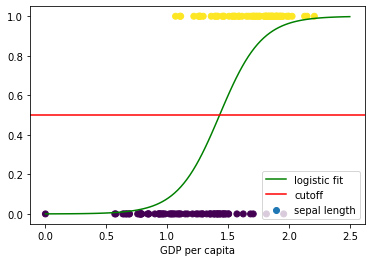

In [5]:
from sklearn import linear_model
from scipy.special import expit
 
model = linear_model.LogisticRegression(C=1e5, solver='lbfgs')
model.fit(X[:,0].reshape(-1,1), y)
x_test = np.linspace(0.0,2.5,100)

y_test = x_test * model.coef_ + model.intercept_
 
sigmoid = expit(y_test)
plt.scatter(X[:,0],y, c=y,label = "sepal length")
plt.plot(x_test,sigmoid.ravel(),c="green", label = "logistic fit")
plt.axhline(.5, color="red", label="cutoff")
plt.legend(loc="lower right") 
plt.xlabel("GDP per capita")

Text(0.5, 0, 'Social support')

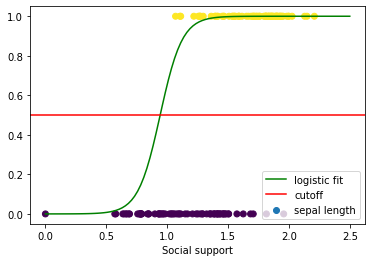

In [6]:
model = linear_model.LogisticRegression(C=1e5, solver='lbfgs')
model.fit(X[:,1].reshape(-1,1), y)
x_test = np.linspace(0.0,2.5,100)

y_test = x_test * model.coef_ + model.intercept_
 
sigmoid = expit(y_test)

plt.scatter(X[:,0],y, c=y,label = "sepal length")
plt.plot(x_test,sigmoid.ravel(),c="green", label = "logistic fit")
plt.axhline(.5, color="red", label="cutoff")
plt.legend(loc="lower right")
plt.xlabel("Social support")


Text(0.5, 0, 'Healthy life expectancy')

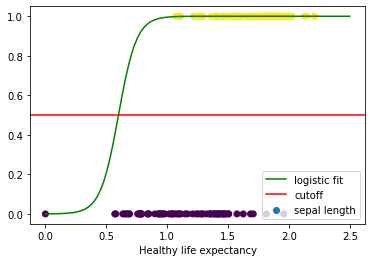

In [7]:
model = linear_model.LogisticRegression(C=1e5, solver='lbfgs')
model.fit(X[:,2].reshape(-1,1), y)
x_test = np.linspace(0.0,2.5,100)

y_test = x_test * model.coef_ + model.intercept_
 
sigmoid = expit(y_test)

plt.scatter(X[:,0],y, c=y,label = "sepal length")
plt.plot(x_test,sigmoid.ravel(),c="green", label = "logistic fit")
plt.axhline(.5, color="red", label="cutoff")
plt.xlabel("1")
plt.legend(loc="lower right") 
plt.xlabel("Healthy life expectancy")

Text(0.5, 0, 'Freedom to make life choices')

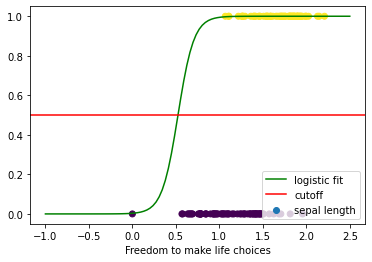

In [8]:
model = linear_model.LogisticRegression(C=1e5, solver='lbfgs')
model.fit(X[:,3].reshape(-1,1), y)
x_test = np.linspace(-1.0,2.5,100)

y_test = x_test * model.coef_ + model.intercept_
 
sigmoid = expit(y_test)

plt.scatter(X[:,0],y, c=y,label = "sepal length")
plt.plot(x_test,sigmoid.ravel(),c="green", label = "logistic fit")
plt.axhline(.5, color="red", label="cutoff")
plt.legend(loc="lower right") 
plt.xlabel("Freedom to make life choices")


Text(0.5, 0, 'Generosity')

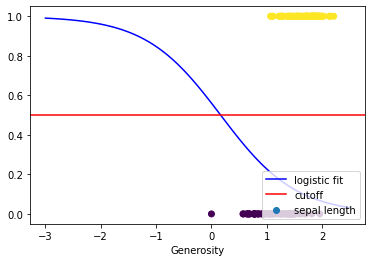

In [9]:
model = linear_model.LogisticRegression(C=1e5, solver='lbfgs')
model.fit(X[:,4].reshape(-1,1), y)
x_test = np.linspace(-3,2.5,100)

y_test = x_test * model.coef_ + model.intercept_
 
sigmoid = expit(y_test)

plt.scatter(X[:,0],y, c=y,label = "sepal length")
plt.plot(x_test,sigmoid.ravel(),c="blue", label = "logistic fit")
plt.axhline(.5, color="red", label="cutoff")
plt.legend(loc="lower right") 
plt.xlabel("Generosity")


Text(0.5, 0, 'Perceptions of corruption')

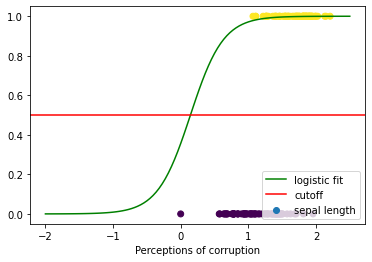

In [10]:
model = linear_model.LogisticRegression(C=1e5, solver='lbfgs')
model.fit(X[:,5].reshape(-1,1), y)
x_test = np.linspace(-2,2.5,100)

y_test = x_test * model.coef_ + model.intercept_
 
sigmoid = expit(y_test)

plt.scatter(X[:,0],y, c=y,label = "sepal length")
plt.plot(x_test,sigmoid.ravel(),c="green", label = "logistic fit")
plt.axhline(.5, color="red", label="cutoff")
plt.legend(loc="lower right") 
plt.xlabel("Perceptions of corruption")


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
import statsmodels.api as sm
from statsmodels.api import Logit, add_constant
X_const = add_constant(X)
logit_model=sm.Logit(y,X_const)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.237120
         Iterations 9
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.658     
Dependent Variable: Is.Happy         AIC:              83.2392   
Date:               2022-04-17 19:01 BIC:              104.1244  
No. Observations:   146              Log-Likelihood:   -34.620   
Df Model:           6                LL-Null:          -101.19   
Df Residuals:       139              LLR p-value:      2.8131e-26
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     9.0000                                       
------------------------------------------------------------------
            Coef.    Std.Err.     z     P>|z|    [0.025    0.975] 
------------------------------------------------------------------
const      -19.5489    3.8094  -5.1318  0.0000  -27.0151  -12.0826
x1           1.1457    1.7935   0.6388  0.5230   -2.3696    4.

In [12]:
feature = ['Explained by: Social support','Explained by: Healthy life expectancy', 
           'Explained by: Freedom to make life choices']
X1 = df[feature]
X1_const = add_constant(X1)
logit_model=sm.Logit(y,X1_const)
result1=logit_model.fit()
print(result1.summary2())

Optimization terminated successfully.
         Current function value: 0.248417
         Iterations 9
                                       Results: Logit
Model:                        Logit                     Pseudo R-squared:          0.642     
Dependent Variable:           Is.Happy                  AIC:                       80.5378   
Date:                         2022-04-17 19:01          BIC:                       92.4723   
No. Observations:             146                       Log-Likelihood:            -36.269   
Df Model:                     3                         LL-Null:                   -101.19   
Df Residuals:                 142                       LLR p-value:               5.8735e-28
Converged:                    1.0000                    Scale:                     1.0000    
No. Iterations:               9.0000                                                         
--------------------------------------------------------------------------------------------

In [13]:
X_train,X_test,y_train,y_test=train_test_split(X1,y,test_size=0.3,random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.89


In [14]:
from sklearn import metrics
y_pred = logreg.predict(X_test)
print(f'Accuracy Score:\n{accuracy_score(y_test, y_pred):0.3f}')
probs = logreg.predict_proba(X_test)
print('ROC AUC Score:')
print(roc_auc_score(y_test, probs[:,1]))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy Score:
0.886
ROC AUC Score:
0.9178947368421053
Precision: 0.8571428571428571
Recall: 0.96



Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.79      0.86        19
           1       0.86      0.96      0.91        25

    accuracy                           0.89        44
   macro avg       0.90      0.87      0.88        44
weighted avg       0.89      0.89      0.88        44



Text(0.5, 1.0, 'Confusion Matrix')

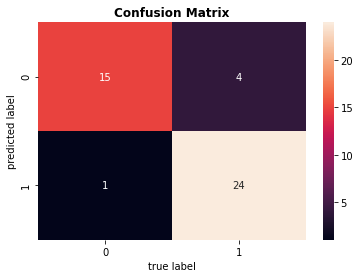

In [15]:
print('\nClassification Report:')
print(classification_report(y_test, y_pred))
import seaborn as sns 
mat=confusion_matrix(y_test, y_pred)
sns.heatmap(mat,annot=True)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.title( 'Confusion Matrix', weight='bold')

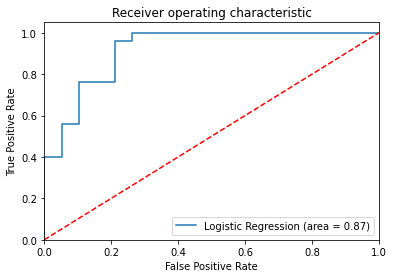

In [16]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()